In [1]:
import os

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
def normalize(data, min_val=-50, max_val=50):
    return (data - min_val) / (max_val - min_val)


# Load your dataset
x_data = np.load("x_data2.npy")
y_data = np.load("y_data2.npy")

# Ensure x has shape (num_samples, 8, 8, 1)
if x_data.ndim == 3:
    x_data = np.expand_dims(x_data, axis=-1)
elif x_data.shape[-1] == 2:
    x_data = x_data[:, :, :, 0:1]  # Keep only the first channel if it's (8, 8, 2)

# Split the data into training and testing sets
split = int(0.8 * len(x_data))
train_x, test_x = x_data[:split], x_data[split:]
train_y, test_y = y_data[:split], y_data[split:]

In [24]:
# Print shapes to verify
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)

train_x shape: (68777, 8, 8, 1)
train_y shape: (68777, 1)
test_x shape: (17195, 8, 8, 1)
test_y shape: (17195, 1)


In [4]:
model = models.Sequential()

model.add(layers.Input(shape=(8, 8, 1)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

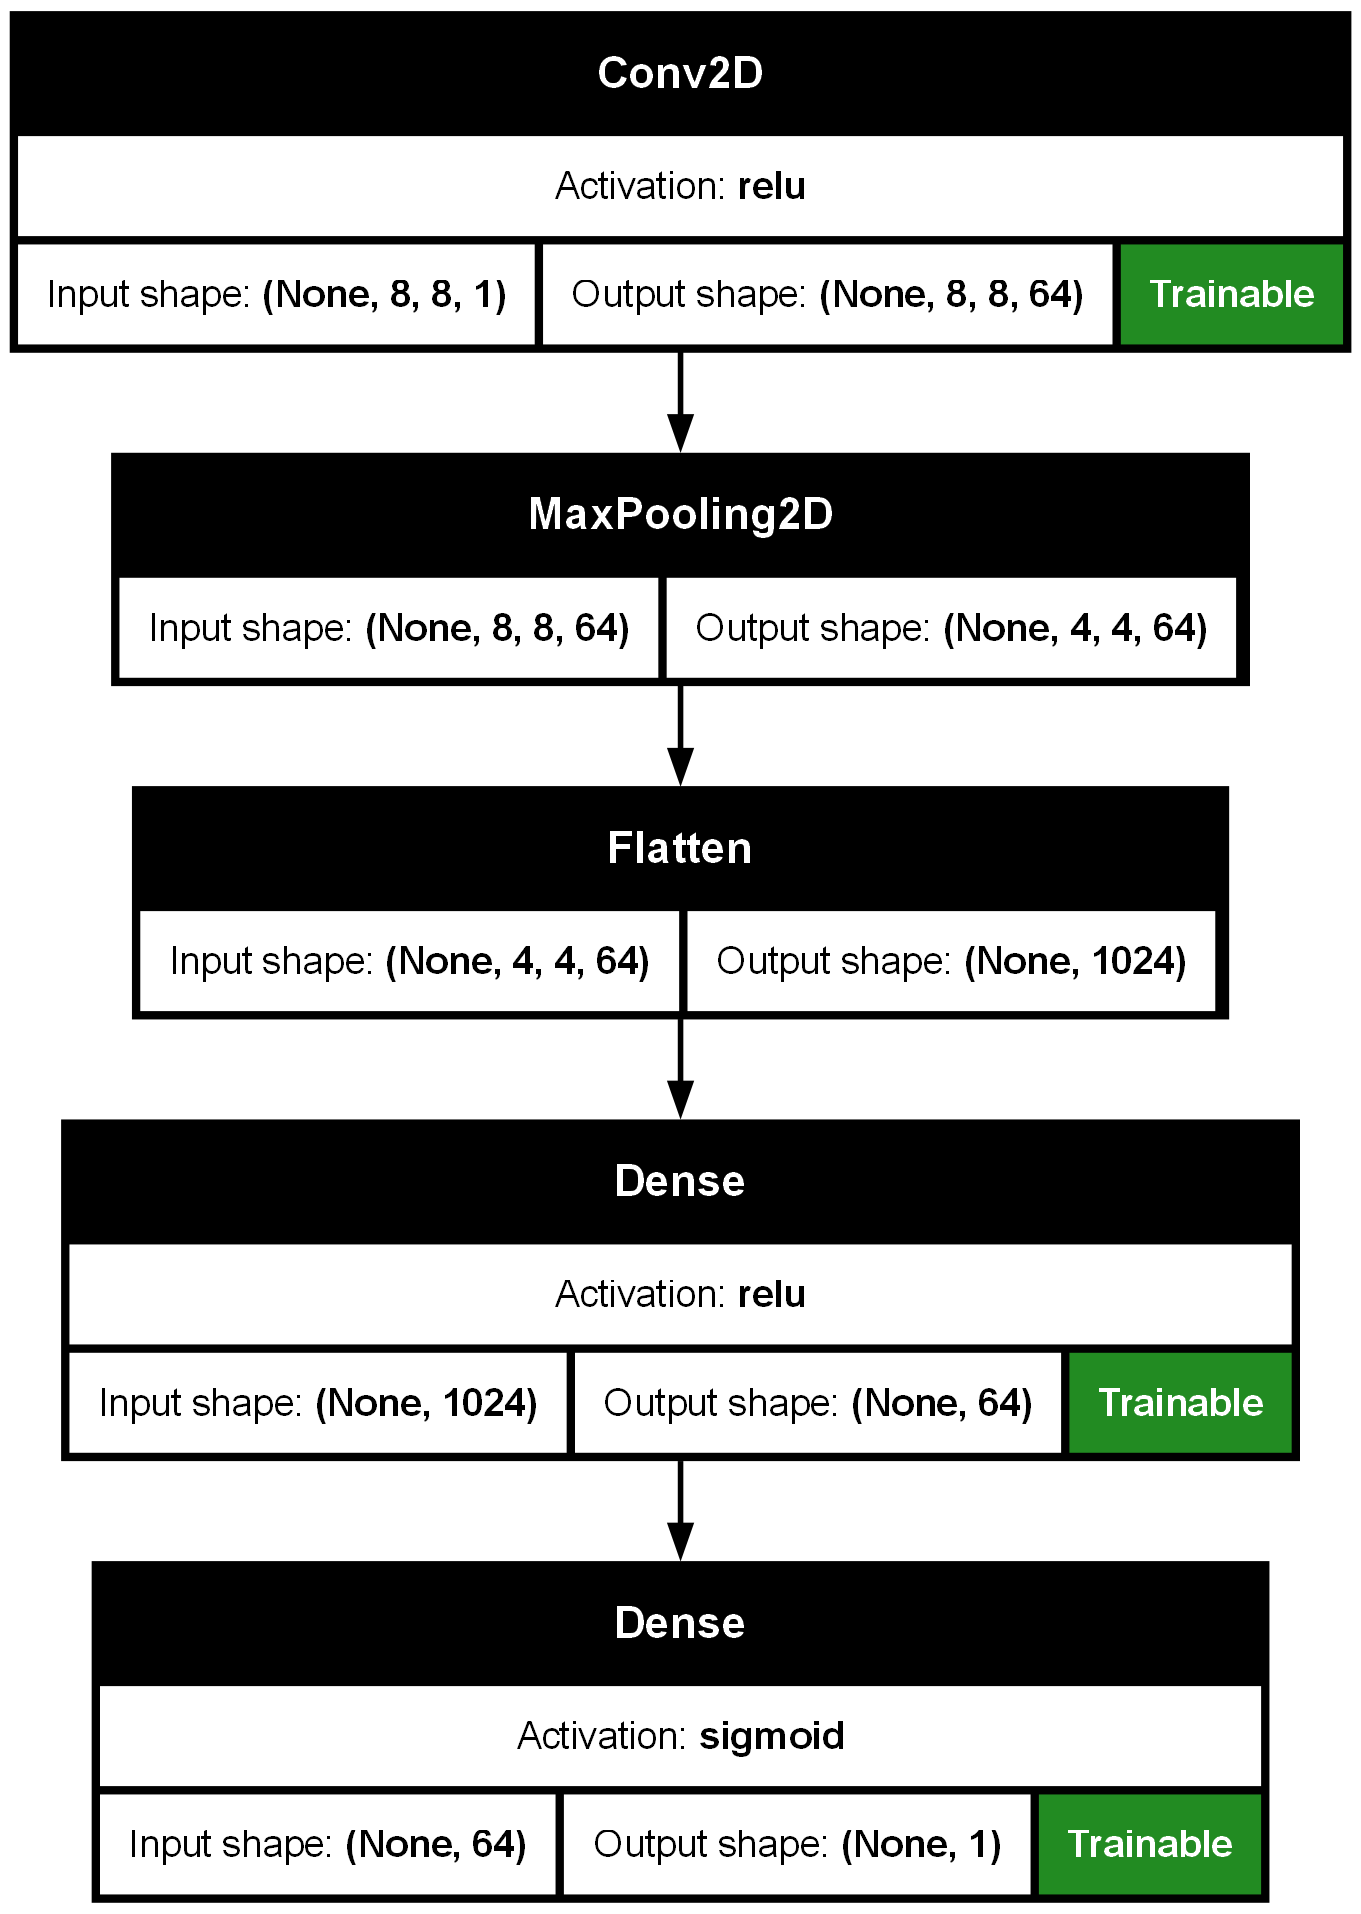

In [6]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)


In [7]:
history = model.fit(train_x, train_y, epochs=32, batch_size=64, validation_split=0.2)

Epoch 1/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0027 - mae: 0.0299 - val_loss: 2.6534e-04 - val_mae: 0.0122
Epoch 2/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1419e-04 - mae: 0.0106 - val_loss: 1.8488e-04 - val_mae: 0.0104
Epoch 3/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3643e-04 - mae: 0.0084 - val_loss: 1.4477e-04 - val_mae: 0.0090
Epoch 4/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.8939e-05 - mae: 0.0071 - val_loss: 1.2428e-04 - val_mae: 0.0081
Epoch 5/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.9100e-05 - mae: 0.0065 - val_loss: 9.6859e-05 - val_mae: 0.0068
Epoch 6/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.4549e-05 - mae: 0.0058 - val_loss: 8.5679e-05 - val_mae: 0.0069
Epoch 7/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4577e-05 - mae: 0.0053 - val_loss: 7.2386e-05 - val_mae: 0.0058
Epoch 8/32
860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4473e-05 - mae: 0.0047 - val_loss: 5.9750e-05 - val_mae: 0.0

In [8]:
loss, mae = model.evaluate(test_x, test_y)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1.6820e-05 - mae: 0.0026
Test Loss: 0.0000
Test MAE: 0.0028


In [9]:
predictions = model.predict(test_x)
# predictions = normalize(predictions)
predictions

538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


array([[0.7440543 ],
       [0.7646074 ],
       [0.74295896],
       ...,
       [0.94623893],
       [0.54612005],
       [0.8872025 ]], dtype=float32)

In [10]:
# test_y = normalize(test_y)
test_y

array([[0.745],
       [0.765],
       [0.745],
       ...,
       [0.94 ],
       [0.545],
       [0.89 ]])

In [11]:
np.hstack((predictions, test_y))   #np.hstack((predictions, np.squeeze(test_y)))

array([[0.74405432, 0.745     ],
       [0.76460743, 0.765     ],
       [0.74295896, 0.745     ],
       ...,
       [0.94623893, 0.94      ],
       [0.54612005, 0.545     ],
       [0.8872025 , 0.89      ]])

In [12]:
test_x[:5].reshape(-1, 8, 8)

array([[[ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  1.,  0., -1., -1.,  0.],
        [ 0.,  0.,  0.,  1.,  0., -1., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1., -1.,  0.],
        [ 0.,  1.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  1.,  0.,  0., -1., -1.,  0.]],

       [[ 0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1.,  0., -1.,  0.,  1.,  1.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  1.,  1.,  0.],
        [ 0., -1., -1.,  0.,  0.,  0.,  1.,  0.],
        [ 0., -1., -1.,  0.,  0.,  1.,  1.,  0.]],

       [[ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  1.,  0., -1., -1.,  0.],
        [ 0.,  0.,  0.,  1.,  0., -1., -1.,  0

In [13]:
model.save('normal_model.keras')  # save the file

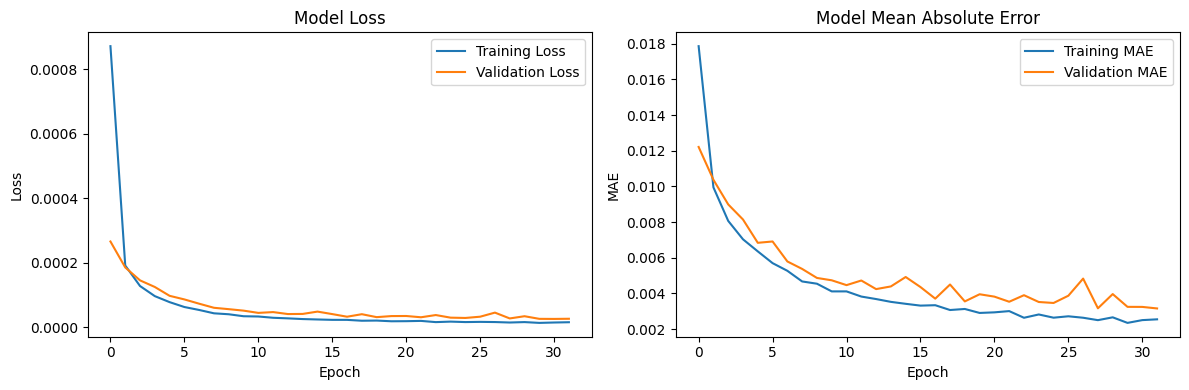

In [14]:
from matplotlib import pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
mse = np.mean((predictions - test_y) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9755254183619895e-05


538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
(17195, 1)
(17195, 1)
Combined data_x shape: (17195, 8, 8, 1)
Combined data_y shape: (17195, 1)
538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
train_x shape: (85972, 8, 8, 1)
train_y shape: (85972,)


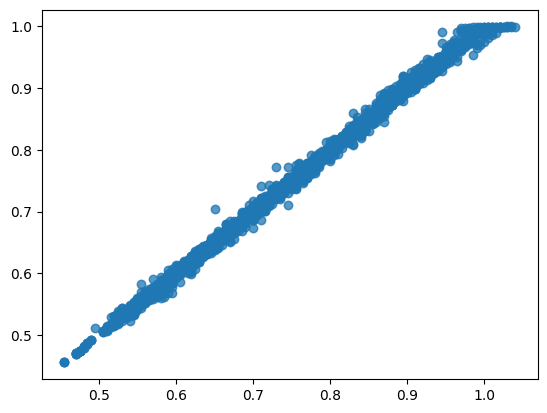

In [16]:


train_x = x_data.reshape(-1, 8, 8, 1)  # Reshape to (8824, 8, 8, 1)
train_y = y_data.reshape(-1)           # Reshape to (8824,)

predictions = model.predict(test_x)
print(predictions.shape)  # Should match (test_y.shape[0],)
print(test_y.shape)

print("test data_x shape:", test_x.shape)  # Should be (99958, 8, 8, 1) or similar
print("test data_y shape:", test_y.shape)  # Should be (99958,)

predictions = model.predict(test_x).flatten()
plt.scatter(test_y, predictions, alpha=0.5)  # Ensure test_y and predictions are same length


# Print shapes to verify
print("train_x shape:", train_x.shape)  # Expecting (8824, 8, 8, 1)
print("train_y shape:", train_y.shape)  # Expecting (8824,)

In [17]:
base_position = test_x[0]
slightly_modified = base_position.copy()
slightly_modified[0, 0, 0] = 1 - slightly_modified[0, 0, 0]  # Flip one piece

base_prediction = model.predict(base_position[np.newaxis, ...])
modified_prediction = model.predict(slightly_modified[np.newaxis, ...])

print(f"Base prediction: {base_prediction[0][0]}")
print(f"Modified prediction: {modified_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Base prediction: 0.7440543174743652
Modified prediction: 0.7506275773048401


In [18]:
test_loss, test_mae = model.evaluate(test_x, test_y, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 0.0000
Test MAE: 0.0028


In [19]:
# # Example (adjust according to your board representation)
# sample_board = np.random.randint(0, 2, (1, 8, 8, 1))
# prediction = model.predict(sample_board)
# print(f"Prediction for sample board: {prediction[0][0]}")

538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


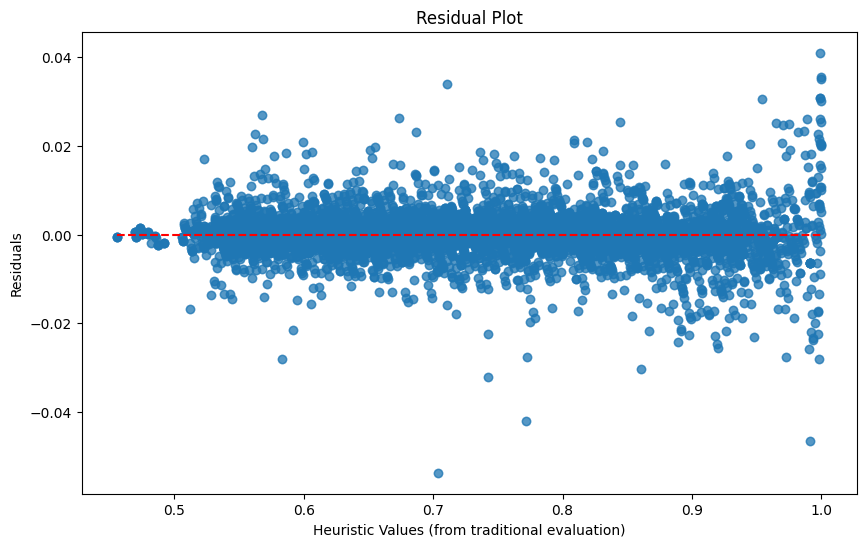

In [20]:
test_y_flat = test_y.flatten()
predictions = model.predict(test_x).flatten()
residuals = test_y_flat - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='r', linestyles='--')
plt.xlabel('Heuristic Values (from traditional evaluation)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

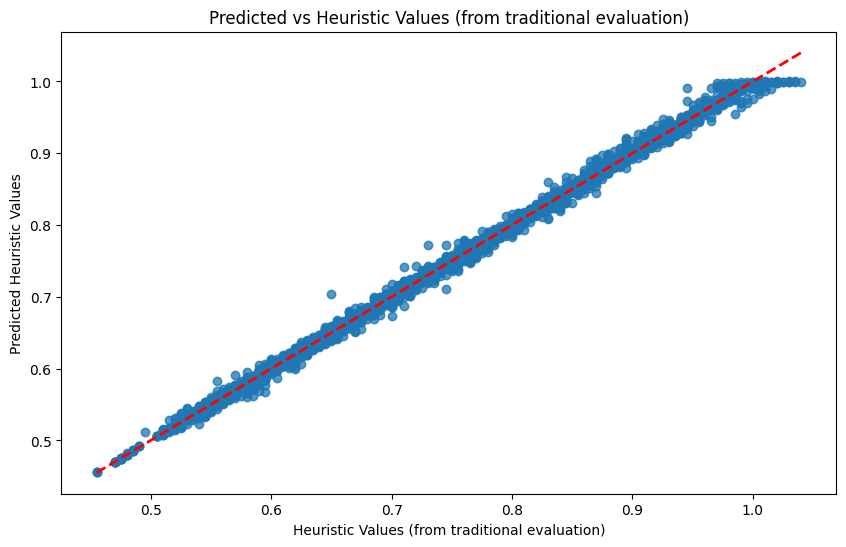

Correlation coefficient: 0.9993


In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Heuristic Values (from traditional evaluation)')
plt.ylabel('Predicted Heuristic Values')
plt.title('Predicted vs Heuristic Values (from traditional evaluation)')
plt.show()

# Calculate and print correlation coefficient
from scipy.stats import pearsonr
correlation, _ = pearsonr(test_y_flat, predictions)
print(f"Correlation coefficient: {correlation:.4f}")

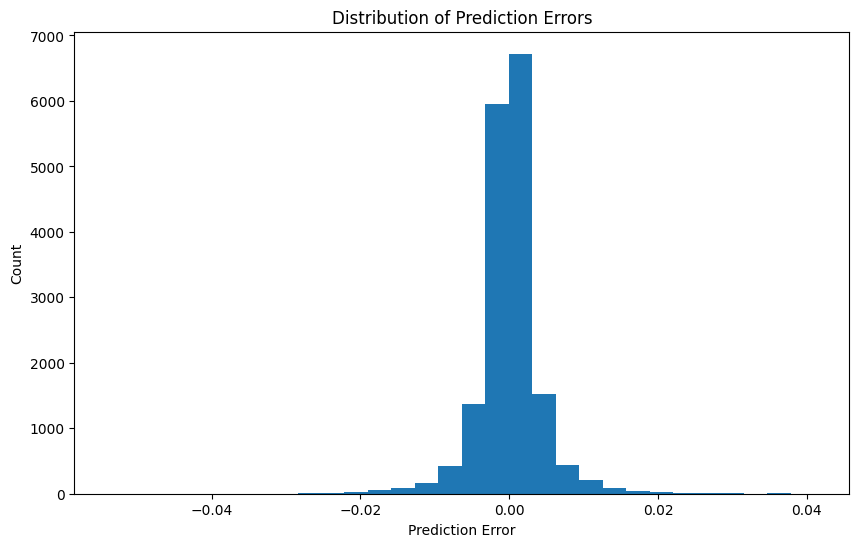

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()